In [2]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [3]:
import spacy.cli
spacy.cli.download("pt_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
pln = spacy.load('pt_core_news_sm')
pln

In [5]:
documento = pln('Estou aprendendo processamento de linguagem natural, curso em Curitipa')

In [6]:
type(documento)

spacy.tokens.doc.Doc


- POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
- Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém
- Lista de tokens: https://spacy.io/api/annotation#pos-tagging
- Português: https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/

In [7]:
for token in documento:
    print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
curso NOUN
em ADP
Curitipa PROPN


### Lematização e sistematização

Lematização

In [8]:
for token in documento:
    print(token.text, token.lemma_)

Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
curso curso
em em
Curitipa Curitipa


In [9]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'curso',
 'cursar']

Stemização

In [10]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [11]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [12]:
for token in documento:
    print(token.text, token.lemma_, stemmer.stem(token.text))

Estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
, , ,
curso curso curs
em em em
Curitipa Curitipa curitip


In [13]:
import pandas as pd 
linhas = []
teste = pd.DataFrame()

for token in documento:
    linha = token.text, token.lemma_, stemmer.stem(token.text)
    linhas .append(linha)
    teste = pd.DataFrame(linhas, columns=['coluna1', 'coluna2', 'coluna3'])

teste

,coluna1,coluna2,coluna3
0,Estou,estar,est
1,aprendendo,aprender,aprend
2,processamento,processamento,process
3,de,de,de
4,linguagem,linguagem,lingu
5,natural,natural,natur
6,",",",",","
7,curso,curso,curs
8,em,em,em
9,Curitipa,Curitipa,curitip


#### Carregamento de Textos

In [14]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [15]:
#'https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial'

In [16]:
#dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Inteligência_artificial')

In [17]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-c

In [18]:
import lxml
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-p

In [19]:
import bs4 as bs

dados_html = bs.BeautifulSoup(dados, 'html.parser')
print(dados_html)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-

In [20]:
paragrafos = dados_html.find_all('p')

In [21]:
len(paragrafos)

65

In [22]:
paragrafos[1]

<p>Algumas das principais áreas relacionadas à IA incluem:
</p>

In [23]:
paragrafos[1].text

'Algumas das principais áreas relacionadas à IA incluem:\n'

In [24]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [25]:
conteudo

'A inteligência artificial (de sigla: IA; do inglês: artificial intelligence, de sigla: AI) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] É também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representanto um marco histórico na computação moderna.[3] Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nAlgumas das principais áreas relacionadas à IA incluem:\nÉ difícil definir especificamente a Inteligência Artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

In [26]:
conteudo = conteudo.lower()
conteudo

'a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] é também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representanto um marco histórico na computação moderna.[3] embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nalgumas das principais áreas relacionadas à ia incluem:\né difícil definir especificamente a inteligência artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

#### Buscas de Textos com Spacy

In [27]:
pln = spacy.load("pt_core_news_sm")
pln

In [28]:
string = 'turing'
token_pesquisa = pln(string)

In [29]:
pln.vocab

In [30]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [31]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 3463, 3464),
 (8661325627334373315, 3473, 3474),
 (8661325627334373315, 3629, 3630),
 (8661325627334373315, 3634, 3635),
 (8661325627334373315, 3640, 3641),
 (8661325627334373315, 3703, 3704),
 (8661325627334373315, 4356, 4357),
 (8661325627334373315, 5573, 5574),
 (8661325627334373315, 5708, 5709),
 (8661325627334373315, 5803, 5804),
 (8661325627334373315, 5920, 5921)]

In [32]:
doc[3463: 3464]

turing

In [33]:
doc[3463-5: 3464+5]

uma contribuição prática de alan turing foi o que se chamou

In [34]:
matches[0], matches[0][1], matches[0][2]


((8661325627334373315, 3463, 3464), 3463, 3464)

In [35]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += "<br /><br />"
display(HTML(f"""... {texto} ... """))

In [36]:
for entidade in doc.ents:
    print(entidade.text, entidade.label_)

pensamento:[1 MISC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
brasil LOC
allen newell PER
herbert simon PER
mccarty PER
marvin minsky PER
mit ORG
darthmouth LOC
estados unidos LOC
fifth generation MISC
japão LOC
prolog MISC
gpt-3[21 MISC
google ORG
wikipédia MISC
john mccarthy PER
andreas kaplan PER
michael haenlein definem PER
john mccarthy PER
john haugeland PER
good PER
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
robótica.[8 ORG
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
turing PER
turing PER
joseph weizenbaum PER
mit ORG
a.l.i.c.e MISC
java MISC
intelligence markup language PER
alicebots LOC
programáveis.[35][36 O

In [37]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

#### Nuvem de palavras e stop words

In [38]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'naquela', 'breve', 'ter', 'sem', 'neste', 'fomos', 'iniciar', 'lá', 'esses', 'pelas', 'ela', 'fui', 'deverá', 'mas', 'vossos', 'quinze', 'tens', 'as', 'algo', 'questão', 'nossos', 'direita', 'a', 'tempo', 'posição', 'és', 'custa', 'isto', 'nenhuma', 'faz', 'novo', 'maiorias', 'de', 'fazem', 'nada', 'fazeis', 'porquanto', 'contra', 'é', 'maior', 'só', 'dentro', 'segundo', 'aquilo', 'forma', 'embora', 'parece', 'quê', 'os', 'são', 'diz', 'esteve', 'cedo', 'parte', 'do', 'porquê', 'podem', 'puderam', 'lado', 'estiveste', 'saber', 'faço', 'ver', 'da', 'ainda', 'aí', 'cá', 'aquelas', 'acerca', 'quieta', 'vários', 'bom', 'que', 'local', 'nesta', 'perto', 'tendes', 'mesmo', 'numa', 'quando', 'primeira', 'tivemos', 'onde', 'seis', 'fazia', 'certamente', 'sim', 'tão', 'obrigada', 'possivelmente', 'fazer', 'antes', 'toda', 'você', 'oitavo', 'nessa', 'um', 'na', 'dessa', 'certeza', 'meio', 'inclusive', 'tenho', 'assim', 'além', 'vai', 'oito', 'foste', 'teu', 'outras', 'tuas', 'o', 'pegar', 'amb

In [39]:
len(STOP_WORDS  )

416

In [40]:
doc = pln(conteudo)
lista_token = []
for token in doc:
     lista_token.append(token.text)


In [41]:
print(lista_token)

['a', 'inteligência', 'artificial', '(', 'de', 'sigla', ':', 'ia', ';', 'do', 'inglês', ':', 'artificial', 'intelligence', ',', 'de', 'sigla', ':', 'ai', ')', 'é', 'um', 'campo', 'de', 'estudo', 'multidisciplinar', 'que', 'abrange', 'varias', 'áreas', 'do', 'conhecimento.[1][2', ']', 'é', 'também', 'um', 'conjunto', 'de', 'novas', 'tecnologias', 'que', 'permitem', 'aos', 'aparelhos', 'smart', 'executarem', 'várias', 'funções', 'avançadas', 'de', 'modo', 'quase', 'autônomo,[2][3', ']', 'representanto', 'um', 'marco', 'histórico', 'na', 'computação', 'moderna.[3', ']', 'embora', 'seu', 'desenvolvimento', 'tenha', 'avançado', 'mais', 'na', 'ciência', 'da', 'computação', ',', 'sua', 'abordagem', 'interdisciplinar', 'envolve', 'contribuições', 'de', 'diversas', 'disciplina', '.', '\n', 'algumas', 'das', 'principais', 'áreas', 'relacionadas', 'à', 'ia', 'incluem', ':', '\n', 'é', 'difícil', 'definir', 'especificamente', 'a', 'inteligência', 'artificial', ',', 'mas', 'ao', 'longo', 'do', 'tem

In [42]:
len(lista_token)

6325

In [43]:
sem_stop = []
for palavra in lista_token:
    if pln.vocab[palavra].is_stop == False:
        sem_stop.append(palavra)

In [44]:
print(sem_stop)
len(sem_stop)

['inteligência', 'artificial', '(', 'sigla', ':', 'ia', ';', 'inglês', ':', 'artificial', 'intelligence', ',', 'sigla', ':', 'ai', ')', 'campo', 'estudo', 'multidisciplinar', 'abrange', 'varias', 'áreas', 'conhecimento.[1][2', ']', 'conjunto', 'tecnologias', 'permitem', 'aparelhos', 'smart', 'executarem', 'várias', 'funções', 'avançadas', 'modo', 'quase', 'autônomo,[2][3', ']', 'representanto', 'marco', 'histórico', 'computação', 'moderna.[3', ']', 'desenvolvimento', 'tenha', 'avançado', 'ciência', 'computação', ',', 'abordagem', 'interdisciplinar', 'envolve', 'contribuições', 'diversas', 'disciplina', '.', '\n', 'principais', 'áreas', 'relacionadas', 'ia', 'incluem', ':', '\n', 'difícil', 'definir', 'especificamente', 'inteligência', 'artificial', ',', 'longo', 'seguiu', 'linhas', 'pensamento:[1', ']', '\n', 'conceito', 'amplo', 'recebe', 'tantas', 'definições', 'significados', 'diferentes', 'palavra', 'inteligência.[4', ']', 'considerar', 'características', 'básicas', 'desses', 'sist

3660

In [45]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [46]:
from wordcloud import WordCloud

cloud = WordCloud(background_color = 'white', max_words = 100, colormap = color_map)

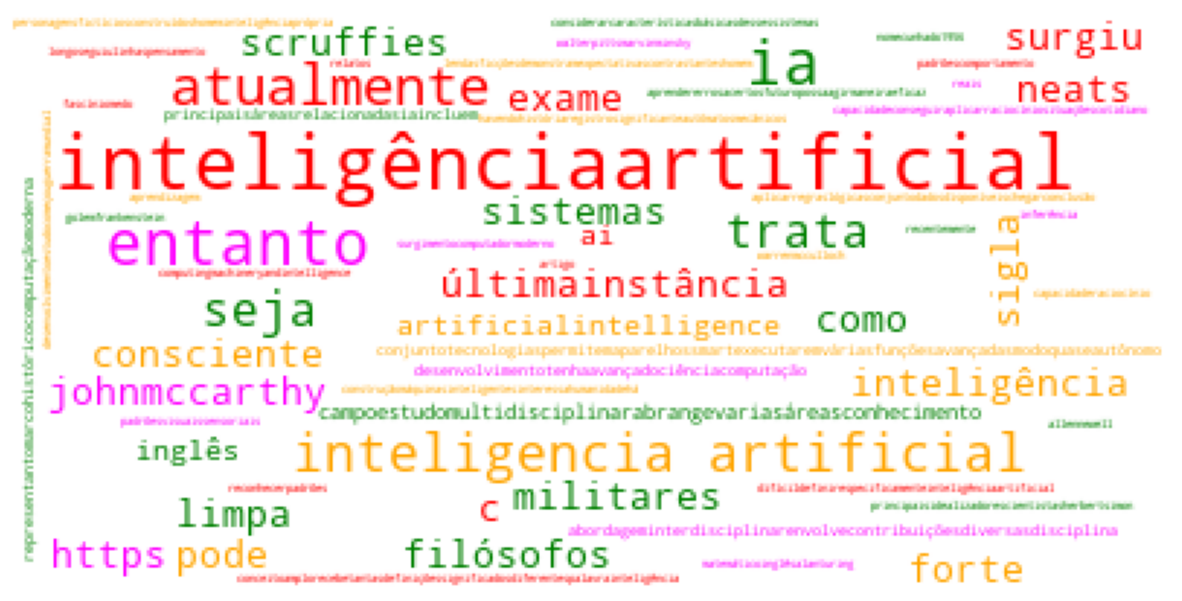

In [47]:
import matplotlib.pyplot as plt 
cloud = cloud.generate(''.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

## Extração de entidades nomeadas

- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado
- Siglas: https://spacy.io/api/annotation#named-entities

### Classificação de Textos com spaCY

##### Etapa 1: Importação e instalação das bibliotecas

In [48]:
import pandas as pd 
import string
import spacy
import random
import seaborn as sns
import numpy as np 


In [49]:
import spacy
spacy.__version__

'3.7.5'

In [50]:
import spacy.cli
spacy.cli.download("pt_core_news_sm")
pln = spacy.load('pt_core_news_sm')
pln

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


##### Etapa : Carregamento da base de dados

In [51]:
base_dados = pd.read_csv(r'Bases de dados\base_treinamento.txt', encoding='utf-8')
base_dados.shape

(196, 2)

In [52]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [53]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


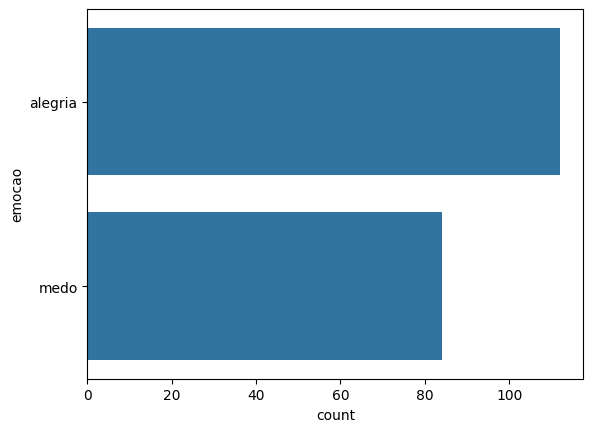

In [54]:
sns.countplot(base_dados['emocao'], label = 'contagem');

##### Etapa 3: Função para Pré-Processamento dos textos

In [55]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [56]:
from spacy.lang.pt import STOP_WORDS
stop_words = STOP_WORDS


In [57]:
print(stop_words)

{'naquela', 'breve', 'ter', 'sem', 'neste', 'fomos', 'iniciar', 'lá', 'esses', 'pelas', 'ela', 'fui', 'deverá', 'mas', 'vossos', 'quinze', 'tens', 'as', 'algo', 'questão', 'nossos', 'direita', 'a', 'tempo', 'posição', 'és', 'custa', 'isto', 'nenhuma', 'faz', 'novo', 'maiorias', 'de', 'fazem', 'nada', 'fazeis', 'porquanto', 'contra', 'é', 'maior', 'só', 'dentro', 'segundo', 'aquilo', 'forma', 'embora', 'parece', 'quê', 'os', 'são', 'diz', 'esteve', 'cedo', 'parte', 'do', 'porquê', 'podem', 'puderam', 'lado', 'estiveste', 'saber', 'faço', 'ver', 'da', 'ainda', 'aí', 'cá', 'aquelas', 'acerca', 'quieta', 'vários', 'bom', 'que', 'local', 'nesta', 'perto', 'tendes', 'mesmo', 'numa', 'quando', 'primeira', 'tivemos', 'onde', 'seis', 'fazia', 'certamente', 'sim', 'tão', 'obrigada', 'possivelmente', 'fazer', 'antes', 'toda', 'você', 'oitavo', 'nessa', 'um', 'na', 'dessa', 'certeza', 'meio', 'inclusive', 'tenho', 'assim', 'além', 'vai', 'oito', 'foste', 'teu', 'outras', 'tuas', 'o', 'pegar', 'amb

In [58]:
len(stop_words)

416

In [59]:
pln

In [60]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)

  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [61]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, curso em curitiba')
teste

'aprender processamento linguagem natural curso curitiba'

##### Etapa 4: Pré Processamento da base de dados 

In [62]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [63]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [64]:
base_dados.head()

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria


####  Tratamento da Classe

In [65]:
exemplo_base_dados = [["este trabalho é agradável", {"ALEGRIA": True, "MEDO": False}],
                      ["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

In [66]:
type(exemplo_base_dados)

list

In [67]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [68]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [69]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [70]:
type(exemplo_base_dados[0][1])

dict

In [71]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  #print(texto, emocao)
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

In [72]:
len(base_dados_final)

196

In [73]:
base_dados_final[0]

['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]

In [74]:
base_dados_final[0][0]

'trabalho agradável'

In [75]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [76]:
type(base_dados_final[0][1])

dict

In [77]:
base_dados_final

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gosto ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amo', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixoneir', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sintar hoje', {'ALEGRIA': Tr

#### Etapa 5: Criação do classificador

In [78]:
from spacy.training import Example

In [79]:
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("ALEGRIA")
textcat.add_label("MEDO")
historico = []

In [80]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
    modelo.update(examples, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 1.720904678106308}
{'textcat': 5.021480941561768e-11}
{'textcat': 5.859823287409152e-12}
{'textcat': 1.3850762035786182e-12}
{'textcat': 4.754379737668436e-13}
{'textcat': 1.854606717155492e-13}
{'textcat': 8.233814072043785e-14}
{'textcat': 3.982913962359493e-14}
{'textcat': 1.8988700067070857e-14}
{'textcat': 9.387028603307924e-15}


In [81]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [82]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.72090468e+00, 5.02148094e-11, 5.85982329e-12, 1.38507620e-12,
       4.75437974e-13, 1.85460672e-13, 8.23381407e-14, 3.98291396e-14,
       1.89887001e-14, 9.38702860e-15])

Text(0, 0.5, 'Erro')

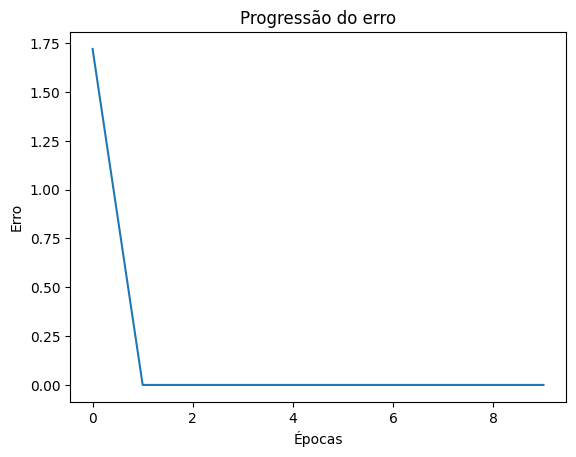

In [83]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [84]:
modelo.to_disk("modelo")

#### Etapa 6: Testes com uma frase

In [85]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [86]:
texto_positivo = 'eu adoro cor dos seus olhos'


In [87]:
previsao = modelo_carregado(texto_positivo)
previsao

eu adoro cor dos seus olhos

In [88]:
previsao = modelo_carregado(texto_positivo)
previsao

eu adoro cor dos seus olhos

In [89]:
previsao.cats

{'ALEGRIA': 0.9999736547470093, 'MEDO': 2.638253863551654e-05}

In [90]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 8.792980565885955e-08, 'MEDO': 0.9999998807907104}

#### Etapa 7: Avaliação do Modelo

##### Avaliação na base de treinamento

In [91]:
previsoes = []
for texto in base_dados['texto']:
    #print(texto)
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [92]:
previsoes

[{'ALEGRIA': 1.0, 'MEDO': 9.190491034871684e-09},
 {'ALEGRIA': 1.0, 'MEDO': 2.3911908897389367e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.7385024975169472e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.4607581810821557e-08},
 {'ALEGRIA': 1.0, 'MEDO': 6.789114603833468e-09},
 {'ALEGRIA': 1.0, 'MEDO': 3.130799797190775e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.029109052476997e-08},
 {'ALEGRIA': 1.0, 'MEDO': 4.154254895638587e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.172195052134839e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.1989127791121064e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.1030142960398734e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.990747915987413e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.0607222595003805e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.0902451386129997e-08},
 {'ALEGRIA': 0.9999998807907104, 'MEDO': 7.123190215452269e-08},
 {'ALEGRIA': 1.0, 'MEDO': 4.900193140144893e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.3766726425501474e-08},
 {'ALEGRIA': 1.0, 'MEDO': 8.210600199731743e-09},
 {'ALEGRIA': 1.0, 'MEDO': 2.622035388810673e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2

In [93]:
previsoes_final =[]
for previsao in previsoes:
    if previsao['ALEGRIA'] > previsao['MEDO']:
        previsoes_final.append('alegria')
    else:
        previsoes_final.append('medo') 
    
previsoes_final = np.array(previsoes_final)

In [94]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [95]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [97]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]], dtype=int64)

#### Avaliação Base Teste

In [98]:
base_dados_teste = pd.read_csv(r'Bases de dados\base_teste.txt', encoding='utf-8')
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [99]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [100]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar ingresso,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar,alegria
3,afortunar,alegria
4,benéfico medida,alegria


In [101]:
previsoes = []
for texto in base_dados_teste['texto']:
    #print(texto)
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [102]:
previsoes_final =[]
for previsao in previsoes:
    if previsao['ALEGRIA'] > previsao['MEDO']:
        previsoes_final.append('alegria')
    else:
        previsoes_final.append('medo') 
    
previsoes_final = np.array(previsoes_final)

In [103]:
respostas_reais = base_dados_teste['emocao'].values

In [104]:
accuracy_score(respostas_reais, previsoes_final)

0.5952380952380952

In [105]:
cm  = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[32, 16],
       [18, 18]], dtype=int64)

#### Exercicios Base de Dados do Twiter

Passo 1 - Carregamento das bases de dados

Base Treinammento

* Negative label: 0
* Positive label: 1

In [108]:
python -m spacy download pt_core_news_sm

SyntaxError: invalid syntax (2633804285.py, line 1)

In [2]:
import pandas as pd
import string
import spacy
import en_core_web_sm
import random
import seaborn as sns
import numpy as np
import re

In [3]:
base_treinamento = pd.read_csv('Bases de dados\Twitter\Train50.csv', delimiter = ';')
base_treinamento.head()

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\diego\AppData\Local\Temp\ipykernel_13664\2311005181.py:1: SyntaxWarning: invalid escape sequence '\T'
  base_treinamento = pd.read_csv('Bases de dados\Twitter\Train50.csv', delimiter = ';')


,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [4]:
base_treinamento.shape

(50000, 5)

In [5]:
# sns.countplot(base_treinamento['sentiment'], label = 'contagem')

<Axes: ylabel='count'>

In [6]:
base_treinamento.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [8]:
base_treinamento.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


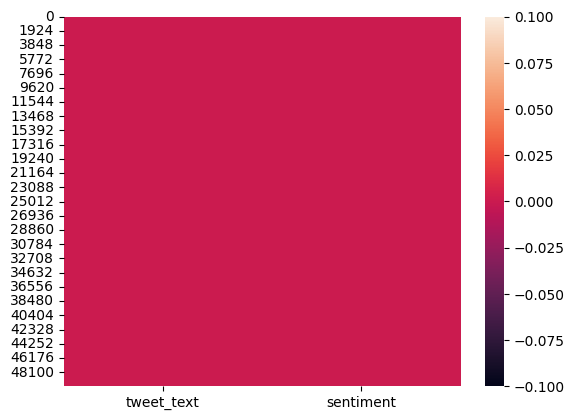

In [9]:
sns.heatmap(pd.isnull(base_treinamento));

## Base de teste

In [10]:
base_teste = pd.read_csv('Bases de dados\Twitter\Test.csv', delimiter=';')
base_teste.head()

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\diego\AppData\Local\Temp\ipykernel_13664\3558908189.py:1: SyntaxWarning: invalid escape sequence '\T'
  base_teste = pd.read_csv('Bases de dados\Twitter\Test.csv', delimiter=';')


,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)
